In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Useful functions**

In [3]:
def result_graph(dataframe, conditions, variable_condition, variable_domain):#conditions is a diction with combinations like {"model":"text_davinci_texct"},variable_domain is a list of choice for variable
  for condition in conditions:
    dataframe=dataframe.loc[dataframe[condition] == conditions[condition]]
  data={}
  head=[]
  print(len(dataframe))
  for var in variable_domain:
    var_result=dataframe.loc[dataframe[variable_condition] == var]
    print(len(var_result))
    accuracy=round(var_result["accuracy"].mean(),2)
    rlr=round(var_result["rlr"].mean()/10,2)
    wrong_rate=round(1-var_result["accuracy"].mean()-var_result["unknown_rate"].mean(),2)
    ftrr=round(var_result["ftrr"].mean(),2)
    try:
      correct_ratio=round(accuracy/(accuracy+wrong_rate),2)
    except:
      correct_ratio=0
    unknown_rate=round(var_result["unknown_rate"].mean(),2)
    data[var]=(accuracy, unknown_rate,ftrr, rlr)

  results_type = ("accuracy", "unknown_rate", "ftrr", "rlr")

  x = np.arange(len(results_type))  # the label locations
  width = 0.25  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained')

  for attribute, measurement in data.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Percentage')
  title="results by "+variable_condition
  for condition in conditions:
      title=title+", "+condition+":"+str(conditions[condition])
  ax.set_title(title)
  ax.set_xticks(x + width, results_type)
  ax.legend(loc='upper right', ncols=1)
  ax.set_ylim(0, 1.1)

  plt.show()

In [4]:
conditions_dict={
    "num_example":[0,1,3],
    "general_scenario":["1","2", "3", "4"],
    "task_instruction":["template0","template1"],
    "format_instruction": ["format_instruction0", "format_instruction1"],     
    "model":["gpt-4-0314", "gpt-3.5-turbo"]
}

Get paths

In [5]:
result_foldername= "/content/drive/My Drive/IS/multi_nli3/multi_nli3_result/multi_nli3_result_mass_list_result/"

In [6]:
scenario="zeroshot_nfi"
zeroshot_nfi_path=result_foldername+"Copy of mass_list_result_"+scenario+".csv"
zeroshot_nfi_df=pd.read_csv(zeroshot_nfi_path)

In [7]:
scenario="fewshot_nfi"
fewshot_nfi_path=result_foldername+"Copy of mass_list_result_"+scenario+".csv"
fewshot_nfi_df=pd.read_csv(fewshot_nfi_path)

In [8]:
scenario="zeroshot_fi"
zeroshot_fi_path=result_foldername+"Copy of mass_list_result_"+scenario+".csv"
zeroshot_fi_df=pd.read_csv(zeroshot_fi_path)

In [9]:
scenario="fewshot_fi"
fewshot_fi_path=result_foldername+"Copy of mass_list_result_"+scenario+".csv"
fewshot_fi_df=pd.read_csv(fewshot_fi_path)

#overall analysis of unimportant features

see how templates or format instruction has a big enough influence 

72
0
24
24
24


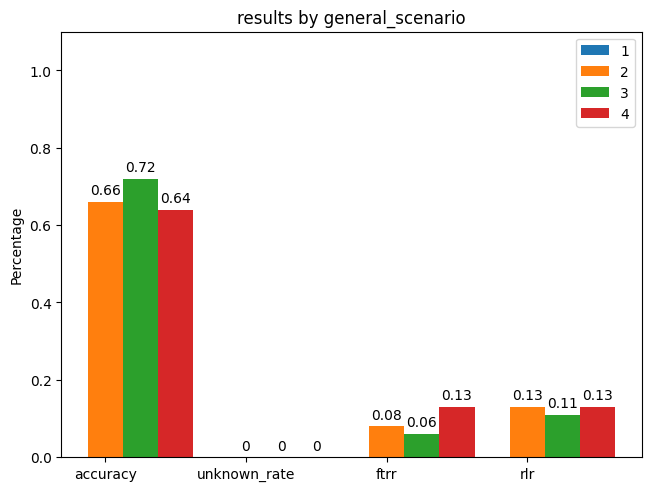

In [10]:
result_graph(dataframe=zeroshot_fi_df, conditions={}, variable_condition= "general_scenario", variable_domain=[1, 2, 3, 4])

24
24
0
0
0


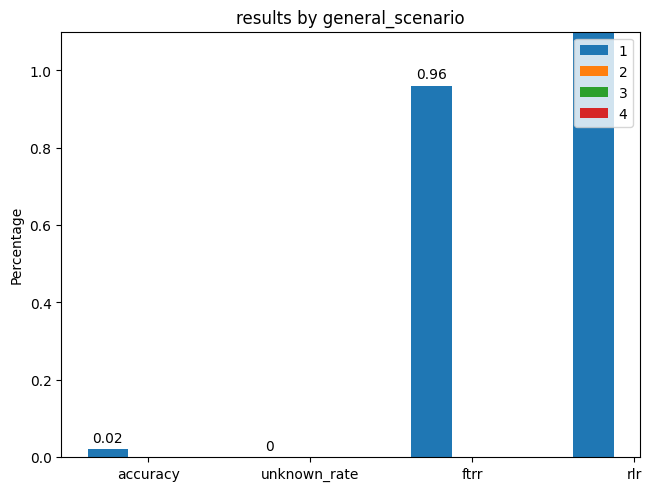

In [11]:
result_graph(dataframe=fewshot_nfi_df, conditions={}, variable_condition= "general_scenario", variable_domain=[1, 2, 3, 4])

144
0
48
48
48


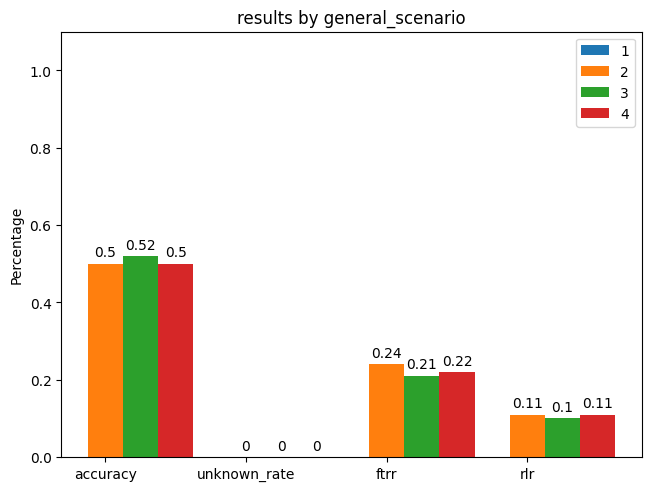

In [12]:
result_graph(dataframe=fewshot_fi_df, conditions={}, variable_condition= "general_scenario", variable_domain=[1, 2, 3, 4])

In [13]:
fi_all_df=pd.concat([fewshot_fi_df, zeroshot_fi_df])

In [14]:
all_df=pd.concat([fewshot_fi_df, zeroshot_fi_df,fewshot_nfi_df])

240
120
120


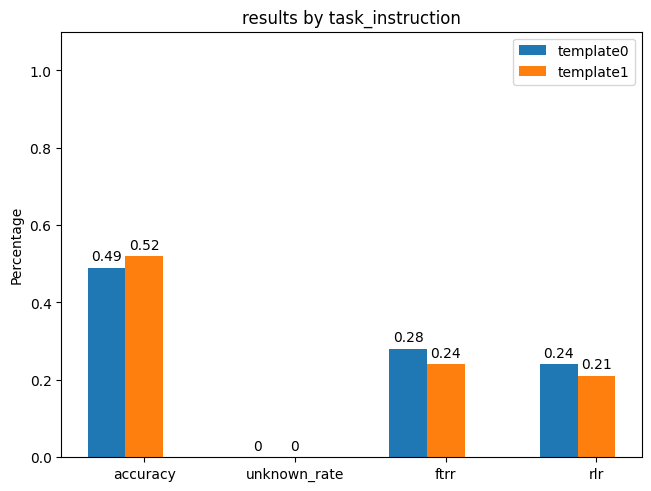

In [15]:
result_graph(dataframe=all_df, conditions={}, variable_condition= "task_instruction", variable_domain=["template0","template1"])

240
132
108


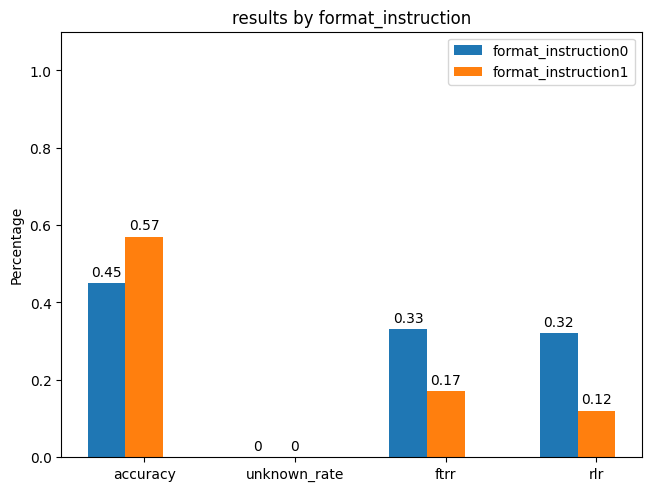

In [16]:
result_graph(dataframe=all_df, conditions={}, variable_condition= "format_instruction", variable_domain=["format_instruction0","format_instruction1"])

overall model performance difference

216
108
108


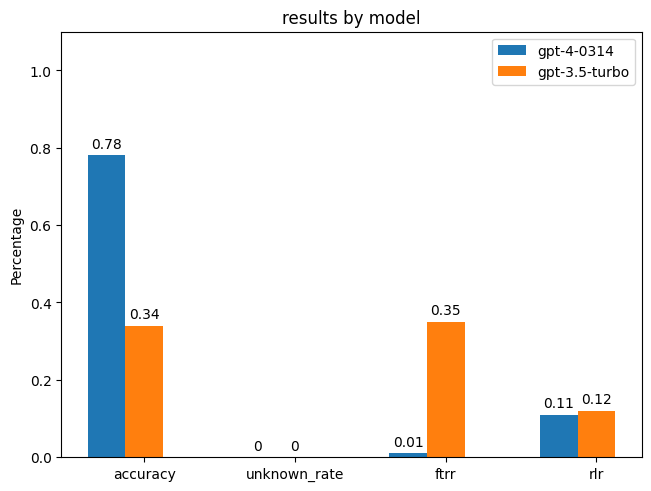

In [17]:
result_graph(dataframe=fi_all_df, conditions={}, variable_condition= "model", variable_domain=["gpt-4-0314", "gpt-3.5-turbo"])

240
24
72
72
72


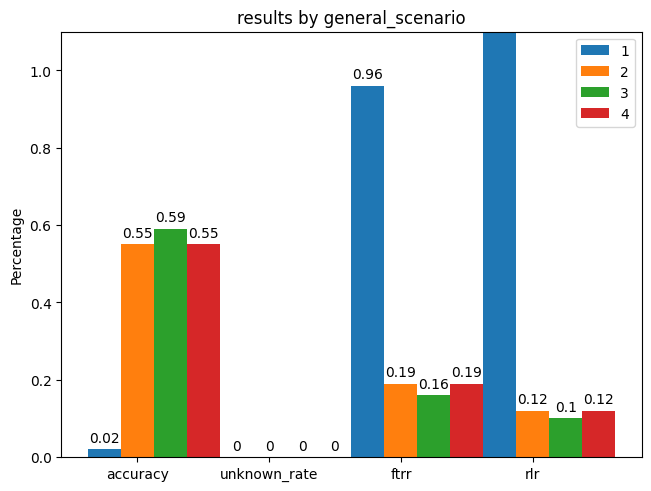

In [18]:
result_graph(dataframe=all_df, conditions={}, variable_condition= "general_scenario", variable_domain=[1, 2, 3, 4])

240
72
0
84


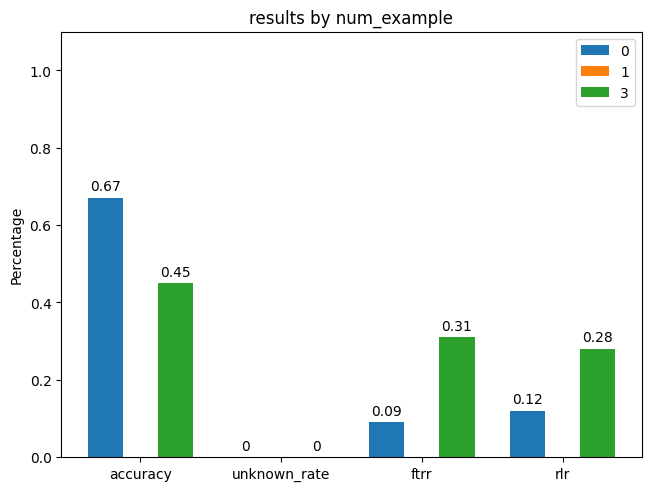

In [19]:
result_graph(dataframe=all_df, conditions={}, variable_condition= "num_example", variable_domain=[0,1,3])

#GPT4 analysis

overall

120
12
36
36
36


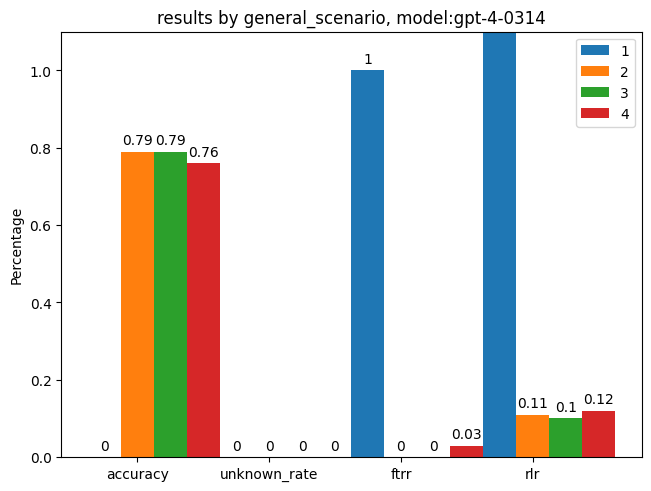

In [20]:
result_graph(dataframe=all_df, conditions={"model":"gpt-4-0314"}, variable_condition= "general_scenario", variable_domain=[1,2,3, 4] )

zeroshot

36
0
12
12
12


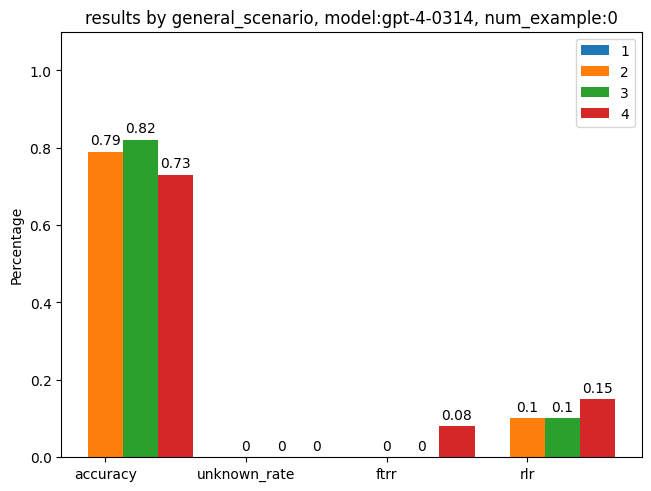

In [21]:
result_graph(dataframe=all_df, conditions={"model":"gpt-4-0314", "num_example":0}, variable_condition= "general_scenario", variable_domain=[1,2,3, 4] )

oneshot

0
0
0
0
0


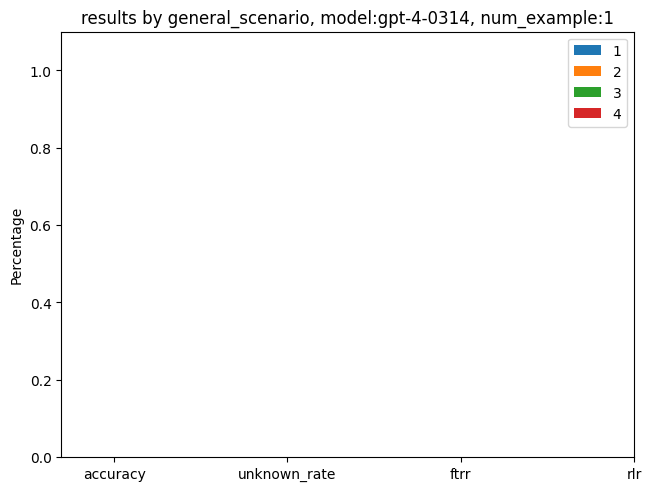

In [22]:
result_graph(dataframe=all_df, conditions={"model":"gpt-4-0314", "num_example":1}, variable_condition= "general_scenario", variable_domain=[1,2,3, 4] )

fewshot

42
6
12
12
12


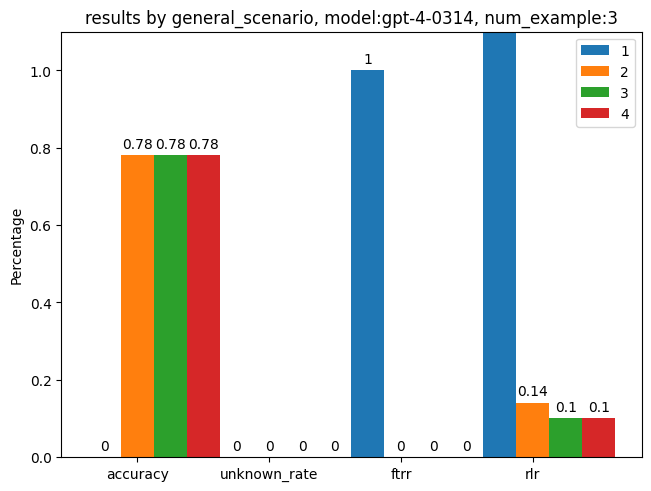

In [23]:
result_graph(dataframe=all_df, conditions={"model":"gpt-4-0314", "num_example":3}, variable_condition= "general_scenario", variable_domain=[1,2,3, 4] )

# Chat GPT

overall

120
12
36
36
36


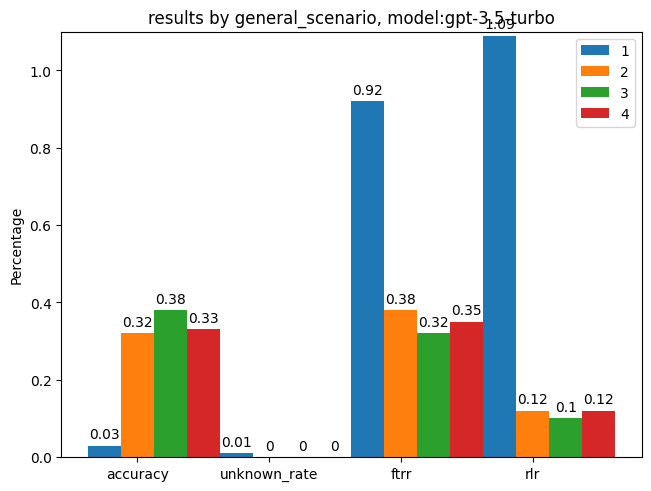

In [24]:
result_graph(dataframe=all_df, conditions={"model":"gpt-3.5-turbo"}, variable_condition= "general_scenario", variable_domain=[1,2,3, 4] )

zeroshot

36
0
12
12
12


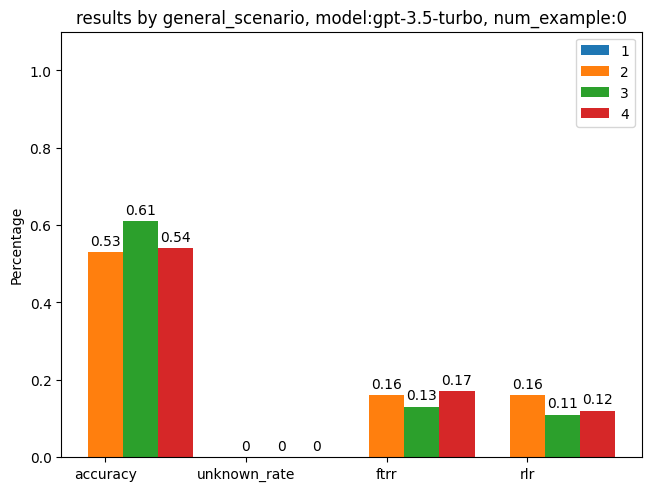

In [25]:
result_graph(dataframe=all_df, conditions={"model":"gpt-3.5-turbo", "num_example":0}, variable_condition= "general_scenario", variable_domain=[1,2,3, 4] )

oneshot

0
0
0
0
0


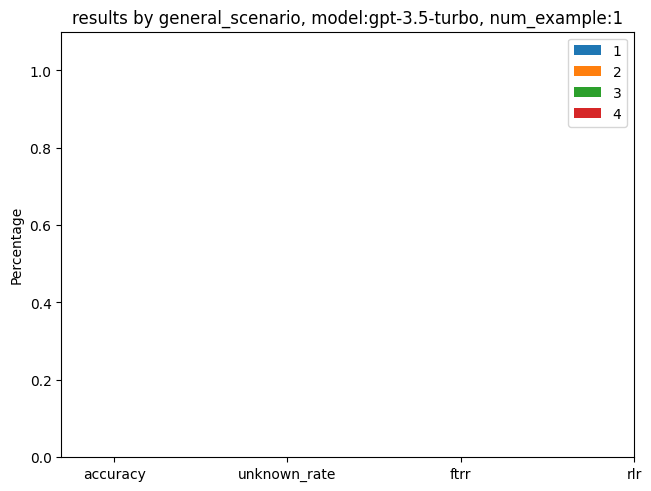

In [26]:
result_graph(dataframe=all_df, conditions={"model":"gpt-3.5-turbo", "num_example":1}, variable_condition= "general_scenario", variable_domain=[1,2,3, 4] )

fewshot

42
6
12
12
12


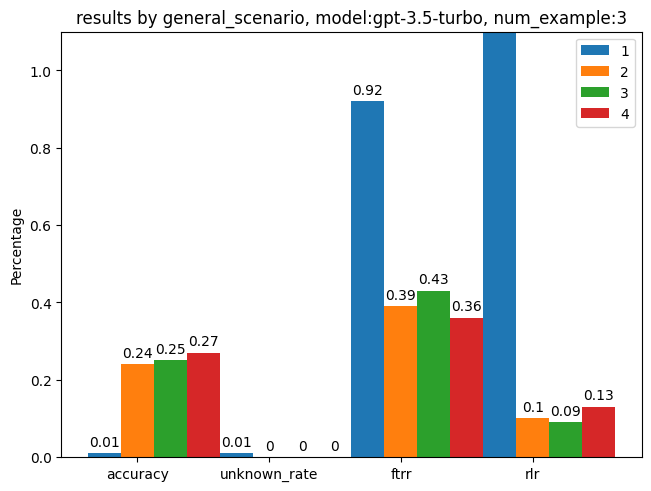

In [27]:
result_graph(dataframe=all_df, conditions={"model":"gpt-3.5-turbo", "num_example":3}, variable_condition= "general_scenario", variable_domain=[1,2,3, 4] )